<a href="https://colab.research.google.com/github/ArunamAlok/DSSI/blob/main/Project2_Alok_Arunam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
p2_ds1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/p2_ds1.csv')

<ipython-input-276-af163d493b5f>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  p2_ds1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/p2_ds1.csv')


In [ ]:
p2_ds1=p2_ds1.replace(r'^\s*$', np.nan, regex=True)
p2_ds1.isnull().sum().sum()

3824558

In [ ]:
p2_ds1.dropna(subset=['WCRV_4','WCRex1'], axis=0, inplace=True)
p2_ds1['WCRex1'].value_counts()


Somewhat well     3763
Very well         2584
Somewhat badly    1363
Very badly         972
Don't know         465
Name: WCRex1, dtype: int64

In [ ]:
values2 = {'I am fairly scared that I will contract the Coronavirus (COVID-19)': 'Scared',
          'I am very scared that I will contract the Coronavirus (COVID-19)': 'Scared',
          'I am not very scared that I will contract the Coronavirus (COVID-19)':'Not Scared',
          'I am not at all scared that I will contract the Coronavirus (COVID-19)' : 'Not Scared',
           'Dont know': 'Scared',
           'Not applicable - I have already contracted Coronavirus (COVID-19)': 'Not Scared'}
p2_ds1["feeling"] = p2_ds1["WCRV_4"].apply(lambda x: values2[x] if x in values2 else 'Others')

values3 = {'Somewhat well': 'High Trust',
          'Very well': 'High Trust',
          'Somewhat badly':'Low Trust',
          'Very badly' : 'Low Trust'}
p2_ds1["trust"] = p2_ds1["WCRex1"].apply(lambda x: values3[x] if x in values3 else 'Others')

In [ ]:
values1 = {'Full time employment': 'Working',
          'Part time employment': 'Working',
          'Not working':'Not Working',
          'Retired' : 'Retired',
          'Full time student': 'Student',
          'Unemployed': 'Not Working',
          'Other': 'Others'}


p2_ds1["employment"] = p2_ds1["employment_status"].apply(lambda x: values1[x] if x in values1 else 'Others')

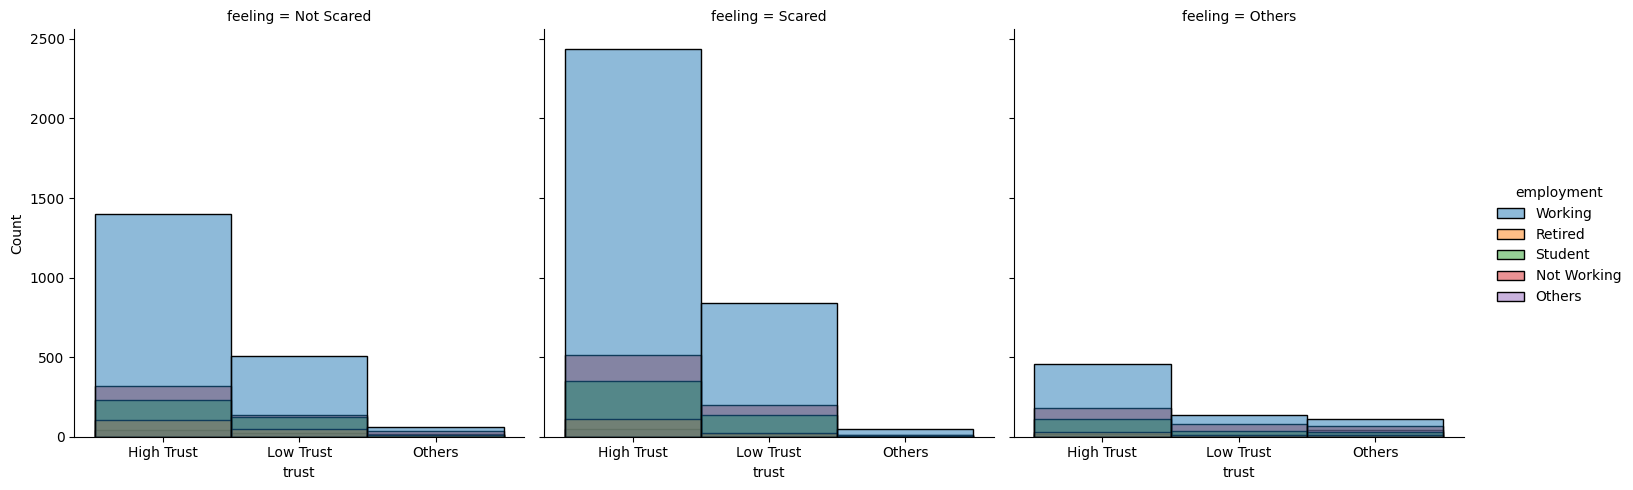

In [ ]:
sns.displot(data=p2_ds1, x="trust", col="feeling", hue='employment')

In [ ]:
#Individuals with co-morbidity (ashthama, cancer, Pulmonary, Diabetes, Heart disease, High Blood Pressure, High Cholestrol)

p2_ds1.dropna(subset=['d1_health_2','d1_health_3','d1_health_5','d1_health_6', 'd1_health_8','d1_health_9','d1_health_10'], axis=0, inplace=True)
p2_ds_co=p2_ds1[(p2_ds1['d1_health_2']=='Yes')|(p2_ds1['d1_health_3']=='Yes')|(p2_ds1['d1_health_5']=='Yes')|(p2_ds1['d1_health_6']=='Yes')|(p2_ds1['d1_health_8']=='Yes')|(p2_ds1['d1_health_9']=='Yes')|(p2_ds1['d1_health_10']=='Yes')]

#p2_ds_co=p2_ds1.groupby(['d1_health_2','d1_health_3','d1_health_5','d1_health_6','d1_health_8','d1_health_9','d1_health_10'])
#print(p2_ds_co.shape)
#p2_ds_co_none=p2_ds_co.get_group(('No','No','No','No','No','No','No')) #12892 people with no co-morbidities #3253 have one or more co-morbidities.

p2_ds_co.shape




(2843, 334)

In [ ]:
p2_ds_co['i12_health_5'].value_counts()

Always        2178
Frequently     306
Sometimes      177
Not at all     114
Rarely          68
Name: i12_health_5, dtype: int64

In [ ]:

p2_ds1["mask_usage"] = p2_ds_co["i12_health_1"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds1["hand_wash"] = p2_ds_co["i12_health_2"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds1["social_distancing"] = p2_ds_co["i12_health_5"].apply(lambda x: values[x] if x in values else 'Others')

In [ ]:
values = {'Always': 'Compliant',
          'Sometimes': 'Compliant',
          'Frequently':'Compliant',
          'Rarely' : 'Non-compliant',
          'Not at all': 'Non-compliant'}


p2_ds_co["mask_usage"] = p2_ds_co["i12_health_1"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds_co["hand_wash"] = p2_ds_co["i12_health_2"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds_co["social_distancing"] = p2_ds_co["i12_health_5"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds_co['age_category'] = pd.cut(x=p2_ds_co['age'],
                     bins=[0, 15, 49, 100],
                     labels=['Children', 'Young','Senior'])


<ipython-input-252-5429651b9581>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds_co["mask_usage"] = p2_ds_co["i12_health_1"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-252-5429651b9581>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds_co["hand_wash"] = p2_ds_co["i12_health_2"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-252-5429651b9581>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
p2_ds_co['mask_usage'].value_counts()

Compliant        2740
Non-compliant     103
Name: mask_usage, dtype: int64

In [ ]:
p2_ds_co['m7_11'].value_counts()

Very much     376
Somewhat      170
Not at all     29
Not sure       26
Name: m7_11, dtype: int64

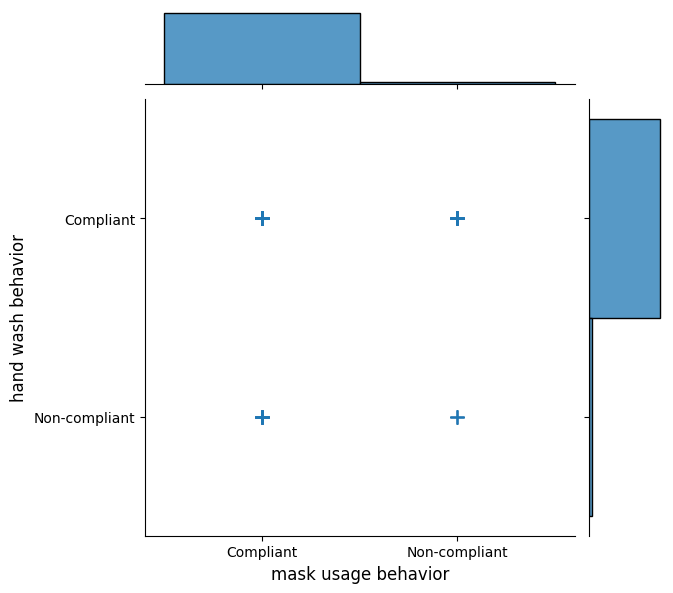

In [ ]:
plot= sns.jointplot(data=p2_ds_co, x="mask_usage", y="hand_wash", marker="+", s=100, marginal_kws=dict(bins=25, fill=True))
plot.set_axis_labels('mask usage behavior', 'hand wash behavior', fontsize=12)

In [ ]:
p2_ds1[(p2_ds1['mask_usage']=='Compliant')& (p2_ds1['hand_wash']=='Compliant')].shape

(2667, 338)

In [ ]:
p2_ds_co.shape

(2843, 338)

In [ ]:
p2_ds1['age_category'] = pd.cut(x=p2_ds1['age'],
                     bins=[0, 15, 49, 100],
                     labels=['Children', 'Young','Senior'])
p2_ds1['age_category'].value_counts()

Young       12953
Senior       2782
Children        0
Name: age_category, dtype: int64

In [ ]:
p2_ds_co_states= p2_ds_co.groupby('state')
#p2_ds1_1.indices
p2_ds_co1=p2_ds_co_states.get_group('Bihar')

p2_ds_co1["mask_usage"] = p2_ds_co1["i12_health_1"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds_co1["hand_wash"] = p2_ds_co1["i12_health_2"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds_co1["social_distancing"] = p2_ds_co1["i12_health_5"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds_co1['age_category'] = pd.cut(x=p2_ds_co1['age'],
                     bins=[0, 15, 49, 100],
                     labels=['Children', 'Young','Senior'])

<ipython-input-310-8d84d4093571>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds_co1["mask_usage"] = p2_ds_co1["i12_health_1"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-310-8d84d4093571>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds_co1["hand_wash"] = p2_ds_co1["i12_health_2"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-310-8d84d4093571>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
values1 = {'Full time employment': 'Working',
          'Part time employment': 'Working',
          'Not working':'Not Working',
          'Retired' : 'Retired',
          'Full time student': 'Student',
          'Unemployed': 'Not Working',
          'Other': 'Others'}


p2_ds_co1["employment"] = p2_ds_co1["employment_status"].apply(lambda x: values1[x] if x in values1 else 'Others')

<ipython-input-305-603a6c5144dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds_co1["employment"] = p2_ds_co1["employment_status"].apply(lambda x: values1[x] if x in values1 else 'Others')


In [ ]:
p2_ds_co['work7_1'].value_counts()

KeyError: 'work7_1'

<Figure size 1000x1200 with 0 Axes>

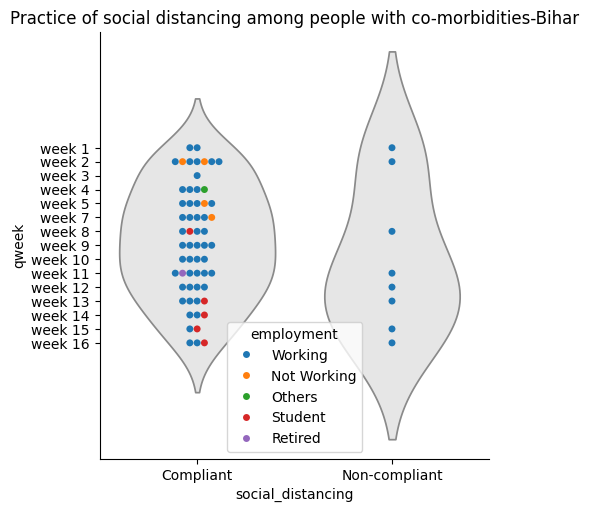

In [ ]:


plt.figure(figsize=(10, 12))
#sns.histplot(data=p2_ds1_1, x="qweek",hue='gender',multiple="stack")

sns.catplot(y="qweek", x="social_distancing", kind="violin", data=p2_ds_co1, inner=None, color=".9")
sns.swarmplot(y="qweek", x="social_distancing", hue="employment",data=p2_ds_co1)

plt.title('Practice of social distancing among people with co-morbidities-Bihar')
plt.show()

In [ ]:
p2_ds1.dropna(subset=['i6_health'], axis=0, inplace=True)
p2_ds1['age category'] = pd.cut(x=p2_ds1['age'],
                     bins=[0, 15, 59, 100],
                     labels=['Children', 'Young and Middle','Senior Citizens'])

In [ ]:
p2_ds1_states= p2_ds1.groupby('state')
#p2_ds1_1.indices
p2_ds1_1=p2_ds1_states.get_group('Andhra Pradesh')
p2_ds1_2=p2_ds1_states.get_group('Tamil Nadu')
p2_ds1_3=p2_ds1_states.get_group('Kerala')
p2_ds1_4=p2_ds1_states.get_group('Uttar Pradesh')
p2_ds1_5=p2_ds1_states.get_group('West Bengal')

In [ ]:
p2_ds1_1

,RecordNo,endtime,gender,state,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,...,w6,w7,w9_1,w9_2,w9_3,w9_4,w9_5,disability,self isolation,age category
532,544,02/04/2020 10:45,Female,Andhra Pradesh,week 1,5,5,6,"Yes, and I tested negative","Yes, and they tested negative",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,Young
730,742,02/04/2020 11:42,Female,Andhra Pradesh,week 1,2,2,3,"Yes, and I tested negative","Yes, and they tested negative",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,Young
1216,1228,08/04/2020 03:44,Female,Andhra Pradesh,week 2,0,0,6,"No, I have not","No, they have not",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,Young
2069,2081,15/04/2020 17:47,Male,Andhra Pradesh,week 3,6,4,8,"Yes, and I have not received my results from t...","Yes, and they have not received their results ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,Young
2241,2253,16/04/2020 00:56,Male,Andhra Pradesh,week 3,0,0,0,"No, I have not","No, they have not",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-compliant,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15074,15086,04/09/2020 03:56,Female,Andhra Pradesh,week 15,50,5,5,"No, I have not","No, they have not",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,Young
15279,15291,16/09/2020 17:40,Male,Andhra Pradesh,week 16,24,1,54,"Yes, and I tested negative","Yes, and they have not received their results ...",...,Yes,4,Most of the time,All the time,Most of the time,All the time,Less than half of the time,No,Compliant,Young
15519,15531,17/09/2020 05:35,Female,Andhra Pradesh,week 16,5,2,1,"No, I have not","No, they have not",...,No,3,All the time,Most of the time,Most of the time,All the time,All the time,"Yes, limited a little",Non-compliant,Young
15552,15564,17/09/2020 06:03,Male,Andhra Pradesh,week 16,3,0,4,"Yes, and I tested negative","Yes, and they tested positive",...,Yes,3,All the time,All the time,All the time,Most of the time,Most of the time,"Yes, limited a lot",Compliant,Young


In [ ]:
p2_ds1_1.dropna(subset=['i12_health_14'], axis=0, inplace=True)
p2_ds1_2.dropna(subset=['i12_health_14'], axis=0, inplace=True)
p2_ds1_3.dropna(subset=['i12_health_14'], axis=0, inplace=True)
p2_ds1_4.dropna(subset=['i12_health_14'], axis=0, inplace=True)
p2_ds1_5.dropna(subset=['i12_health_14'], axis=0, inplace=True)



p2_ds1_1.shape
p2_ds1_1['i12_health_14'].value_counts()


<ipython-input-277-a7fea3c65a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds1_1.dropna(subset=['i12_health_14'], axis=0, inplace=True)
<ipython-input-277-a7fea3c65a63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds1_2.dropna(subset=['i12_health_14'], axis=0, inplace=True)
<ipython-input-277-a7fea3c65a63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds1_3.dropna(subset=['i12_health_14'], axis=0, inplace=True)
<

Always        38
Sometimes     23
Rarely         8
Frequently     8
Not at all     7
Name: i12_health_14, dtype: int64

In [ ]:

values = {'Always': 'Compliant',
          'Sometimes': 'Compliant',
          'Frequently':'Compliant',
          'Rarely' : 'Non-compliant',
          'Not at all': 'Non-compliant'}
#p2_ds1["self isolation"] = p2_ds1["i11_health_1"].apply(lambda x: values[x] if x in values else 'Others')

p2_ds1_1["Large Gatherings"] = p2_ds1_1["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds1_1["Large Gatherings"].value_counts()

p2_ds1_2["Large Gatherings"] = p2_ds1_2["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds1_3["Large Gatherings"] = p2_ds1_3["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds1_4["Large Gatherings"] = p2_ds1_4["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
p2_ds1_5["Large Gatherings"] = p2_ds1_5["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')

<ipython-input-278-6f67ff805c98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds1_1["Large Gatherings"] = p2_ds1_1["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-278-6f67ff805c98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_ds1_2["Large Gatherings"] = p2_ds1_2["i12_health_14"].apply(lambda x: values[x] if x in values else 'Others')
<ipython-input-278-6f67ff805c98>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 532 to 15683
Columns: 338 entries, RecordNo to Large Gatherings
dtypes: category(1), float64(1), int64(6), object(330)
memory usage: 222.0+ KB


<Figure size 1000x1200 with 0 Axes>

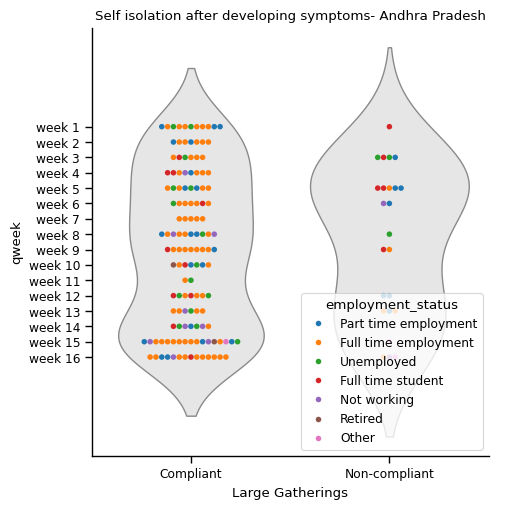

In [ ]:
p2_ds1_1.info()

plt.figure(figsize=(10, 12))
#sns.histplot(data=p2_ds1_1, x="qweek",hue='gender',multiple="stack")


sns.catplot(y="qweek", x="Large Gatherings", kind="violin", data=p2_ds1_2, inner=None, color=".9")
sns.swarmplot(y="qweek", x="Large Gatherings", hue="employment_status",data=p2_ds1_2, size=4)
plt.title('Self isolation after developing symptoms- Andhra Pradesh')
plt.show()



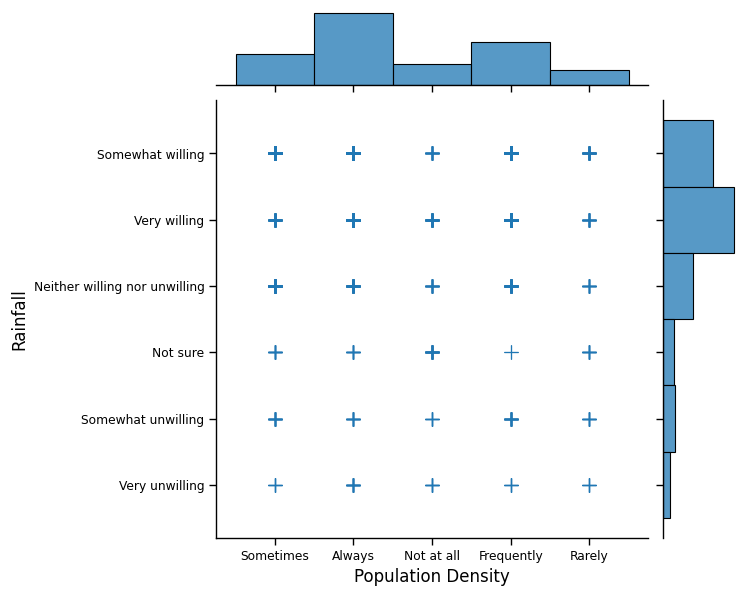

In [ ]:
plot= sns.jointplot( x='i6_health', y='i11_health', marker="+", s=100, marginal_kws=dict(bins=25, fill=True), data=p2_ds1)
plot.set_axis_labels('Population Density', 'Rainfall', fontsize=12)

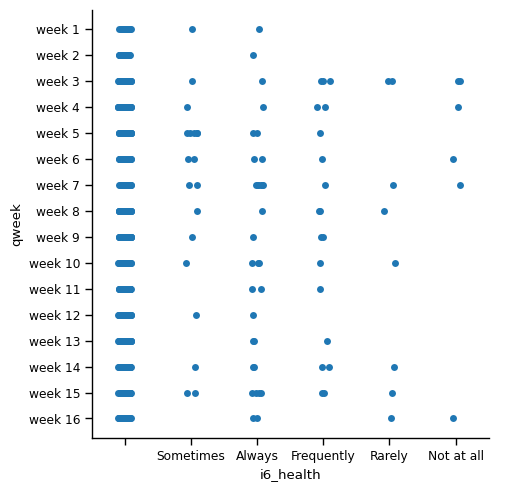

In [ ]:
sns.catplot(y="qweek",x="i6_health", data=p2_ds1_1)

In [ ]:
p2_ds2 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/p2_ds2.xls')
p2_ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 60 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                            --------------  -----         
 0   Timestamp                                                                                                                         240 non-null    datetime64[ns]
 1   Please indicate your age                                                                                                          237 non-null    object        
 2   Gender                                                                                                                            234 non-null    object        
 3   Please indicate which Indian State/Union territory you are c